In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = pd.get_dummies(df.drop("class", axis=1), drop_first= True)
y = df["class"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size= 0.1, random_state=9)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
#help(GradientBoostingClassifier)

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
parameters = {
    "n_estimators" : [1,3,5,10,25,50,100],
    "max_depth" : [2,3,4,5,6]
}

In [10]:
grad_boost = GradientBoostingClassifier()

In [11]:
grid = GridSearchCV(grad_boost, parameters)

In [12]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [1, 3, 5, 10, 25, 50, 100]})

In [13]:
grid.best_params_

{'max_depth': 4, 'n_estimators': 50}

In [15]:
mushroom_pred = grid.predict(X_test)

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

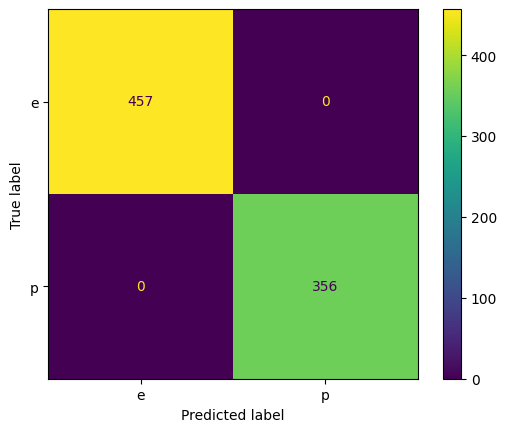

In [17]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [20]:
print(classification_report(y_test, mushroom_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       457
           p       1.00      1.00      1.00       356

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [21]:
feat = grid.best_estimator_.feature_importances_
feat_df = pd.DataFrame(index=X.columns,
 columns=["coefficient"], data= feat)

In [22]:
feat_df = feat_df[feat_df["coefficient"] > 0]

In [23]:
feat_df.sort_values("coefficient", ascending=True).transpose()

,gill-color_r,gill-color_u,cap-color_g,cap-shape_x,population_s,cap-surface_s,cap-shape_f,stalk-surface-below-ring_s,population_v,gill-color_p,...,spore-print-color_h,stalk-root_e,odor_f,stalk-root_r,odor_p,spore-print-color_r,stalk-surface-below-ring_y,bruises_t,stalk-root_c,odor_n
coefficient,5.663404e-21,6.202490e-18,1.443796e-17,1.486007e-17,4.382785e-17,5.017729e-17,5.509636e-17,7.554273e-17,1.769552e-16,2.067858e-16,...,0.011667,0.017582,0.017707,0.027143,0.028554,0.031355,0.035913,0.082056,0.099815,0.61884


In [24]:
feat_df = feat_df[feat_df["coefficient"] > 0.001]

In [25]:
feat_df.sort_values("coefficient", ascending=True).transpose()

,ring-type_p,ring-number_t,ring-number_o,gill-size_n,cap-surface_g,ring-type_n,gill-spacing_w,odor_l,stalk-color-above-ring_w,spore-print-color_u,spore-print-color_h,stalk-root_e,odor_f,stalk-root_r,odor_p,spore-print-color_r,stalk-surface-below-ring_y,bruises_t,stalk-root_c,odor_n
coefficient,0.001131,0.00126,0.001316,0.001435,0.002295,0.002329,0.003374,0.003733,0.004411,0.007024,0.011667,0.017582,0.017707,0.027143,0.028554,0.031355,0.035913,0.082056,0.099815,0.61884


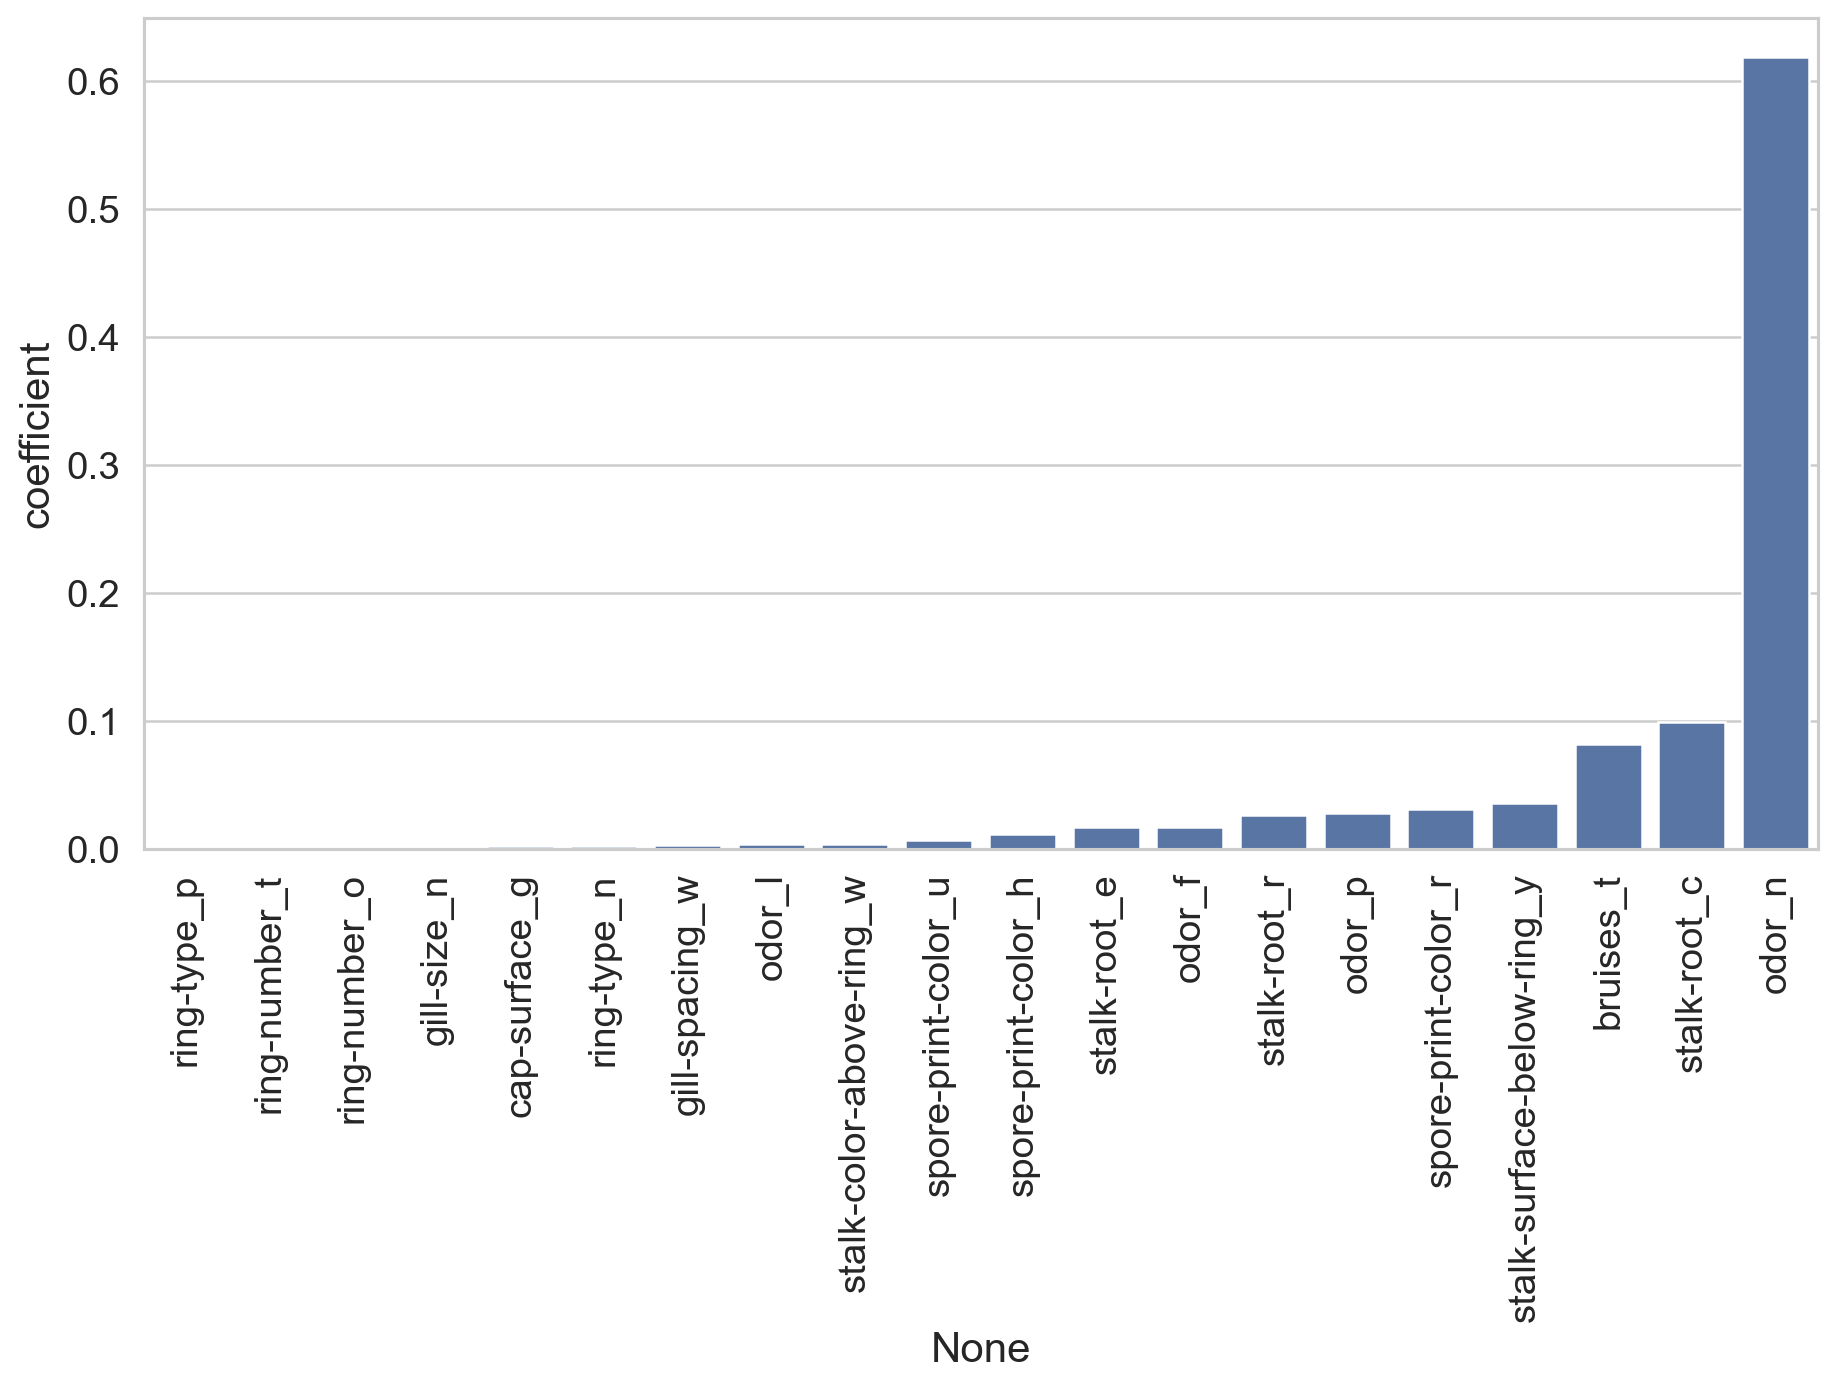

In [26]:
plt.figure(figsize=(12,6), dpi=180)
sns.set(font_scale = 1.4)
sns.set_style("whitegrid")
sns.barplot(x= feat_df.sort_values("coefficient").index,
 y= "coefficient", data=feat_df.sort_values("coefficient"))
plt.xticks(rotation= 90) ;